In [1]:
import numpy as np
import math
import time
import matplotlib.pyplot as plt
from sklearn import linear_model

## Mean Squared Error
$MSE(\hat{w})=\frac{1}{N}(y-\hat{\mathbf{w}}^T\mathbf{x})^T(y-\hat{\mathbf{w}}^T\mathbf{x})$

In [3]:
def compute_mse_vectorized(w,X,Y):
    '''This function returns de MSE for a given dataset and coefficients'''
    res = Y - np.dot(X,w)
    totalError = np.dot(res.T,res)
    return totalError / float(len(Y))

## Regressão Multivariada Vetorizada

In [4]:
def step_gradient_vectorized(w_current,X,Y,alpha):
    '''This function calculates the step gradient using alpha value as stepsize.'''
    w = w_current
    Y_pred = np.dot(X, w) #valores previstos com o vetor de coeficientes atual
    res = np.subtract(Y,Y_pred) #resíduos entre Y observados e Y previstos
    gradient_rss = -2*np.dot(X.T,res) #vetor de derivadas parciais  
    new_w = np.subtract(w ,alpha*(gradient_rss))
    return [new_w, gradient_rss]

In [6]:
def gradient_descent_runner_vectorized(starting_w, X,Y, learning_rate, epsilon):
    '''This function returns the coefficients' vector'''
    w = starting_w
    grad = np.array([np.inf,np.inf,np.inf,np.inf,np.inf])  
    i = 0
    while(np.linalg.norm(grad) >= epsilon):
        w, grad = step_gradient_vectorized(w, X, Y, learning_rate)
    #         if i % 1000 == 0:
    #             print("MSE na iteração {0} é de {1}".format(i,compute_mse_vectorized(w, X, Y)))
    #             print("grad norm: {0}".format(np.linalg.norm(grad)))
    #         i+= 1
    return w

In [7]:
points = np.genfromtxt("../data/sample_treino.csv", delimiter=",")
points = points[1:]

In [8]:
X = points[:,[0,1,2,3,4]]
Y = points[:,[5]]

num_coeficients = X.shape[1]
init_w = np.zeros((num_coeficients,1))

learning_rate = 0.000001
epsilon = 0.5

In [9]:
start_grad_desc_runner_time = time.time()
w = gradient_descent_runner_vectorized(init_w, X, Y, learning_rate, epsilon)
end_grad_desc_runner_time = time.time()
print(end_grad_desc_runner_time - start_grad_desc_runner_time)

1.0046820640563965


In [10]:
# The coefficients
print('Coefficients: \n', w)

Coefficients: 
 [[ 0.13498004]
 [ 0.12815704]
 [ 0.16166461]
 [ 0.46477514]
 [ 0.04199859]]


## Regressão Ridge com sklearn

In [11]:
start_sklearn_reg = time.time()
# Create linear regression object
regr = linear_model.Ridge(alpha=learning_rate, tol=epsilon)
# Train the model using the training sets
regr.fit(X, Y)
end_sklearn_reg = time.time()
print(end_sklearn_reg - start_sklearn_reg)
# The coefficients
print('Coefficients: \n', regr.coef_.T)

0.012279987335205078
Coefficients: 
 [[ 0.10304143]
 [ 0.0464367 ]
 [ 0.16409834]
 [ 0.38117842]
 [ 0.02027816]]


## Comparando Coeficientes de Regressão Implementada vs SKLearn

#### Correlação de w com regr.coef

In [14]:
np.corrcoef(w.T, regr.coef_)

array([[ 1.       ,  0.9758408],
       [ 0.9758408,  1.       ]])

Como é possível observar, os dois vetores possuem alta correlação positiva (aprox. 0.976),
indicando que ambos os vetores crescem na mesma proporção. Para analisar os resultados de forma mais precisa, será utilizado uma regressão linear afim de analisar o quão próximos foram os resultados de ambas as regressões criadas acima.

In [16]:
coef_regr = linear_model.LinearRegression()
coef_regr.fit(w, regr.coef_.T)
coef = coef_regr.coef_

AttributeError: module 'numpy' has no attribute 'linspacespace'

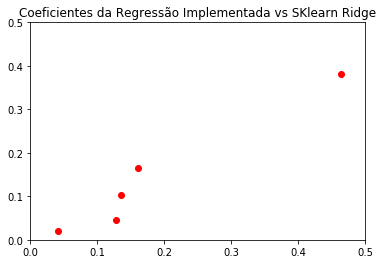

In [18]:
%matplotlib inline
plt.plot(w.T, regr.coef_, 'ro')
plt.axis([0, 0.5, 0, 0.5])
plt.title('Coeficientes da Regressão Implementada vs SKlearn Ridge')
x_sample = np.linspace(0,0.5)
plt.plot(x_sample, x_sample*coef[0], '--', linewidth=2)
plt.show()